In [1]:
### npz file to img2d ###

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import glob

In [3]:
size=64
pmt_id_img2d = np.load('HK_PMT_ID_IMG2D_64x64.npy')
pmt_id_img2d = np.concatenate([ np.array([0,0,0], dtype=np.int64).reshape(1,3), pmt_id_img2d ], axis=0)
pmt_id_img2d.shape

(19747, 3)

In [4]:
### number of PMTs in a pixel ###
#nPMT_in_pixel = np.full( (size,size), -1, np.int64)
nPMT_in_pixel = np.zeros( (size,size), np.int64)
for i in range(1, pmt_id_img2d.shape[0]):
    xbin=pmt_id_img2d[i][1]
    ybin=pmt_id_img2d[i][2]
    nPMT_in_pixel[xbin][ybin] += 1

nPMT_in_pixel[np.where(nPMT_in_pixel==0)]=-1

-1 13


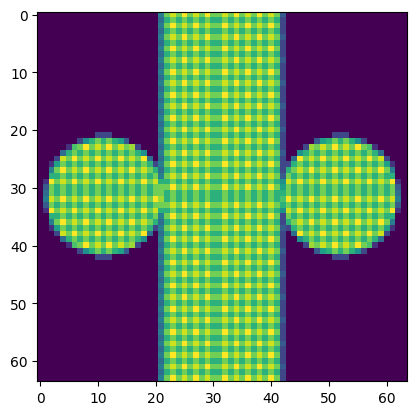

In [5]:
print(nPMT_in_pixel.min(), nPMT_in_pixel.max())
plt.imshow(nPMT_in_pixel)

In [6]:
npz=np.load('/scratch/users/k2261228/work/hyperk/ml/mc/eminus_muminus/npz/eminus_110.0:1000.0MeV_random_4pi_HyperKRealistic_000.npz', allow_pickle=True)

In [7]:
npz.files

['event_id',
 'root_file',
 'pid',
 'position',
 'direction',
 'energy',
 'digi_hit_pmt',
 'digi_hit_charge',
 'digi_hit_time',
 'digi_hit_trigger',
 'true_hit_pmt',
 'true_hit_time',
 'true_hit_pos',
 'true_hit_start_time',
 'true_hit_start_pos',
 'true_hit_parent',
 'track_id',
 'track_pid',
 'track_start_time',
 'track_energy',
 'track_start_position',
 'track_stop_position',
 'track_parent',
 'track_flag',
 'trigger_time',
 'trigger_type']

In [8]:
position = npz['position'][0]
direction = npz['direction'][0]
energy = npz['energy'][0]
hit_pmt = npz['digi_hit_pmt'][0]
hit_charge = npz['digi_hit_charge'][0]
hit_time = npz['digi_hit_time'][0]


In [9]:
q=np.zeros((size,size), np.float64)
t=np.zeros((size,size), np.float64)
nhit= np.zeros((size,size), np.int64)

for pmt, charge, time in zip(hit_pmt, hit_charge, hit_time):
    xbin=pmt_id_img2d[pmt][1]
    ybin=pmt_id_img2d[pmt][2]
    q[xbin][ybin] += charge
    t[xbin][ybin] += time
    nhit[xbin][ybin] += 1

nhit[np.where(nhit==0)]=1

0.0 311.4197506904602
-0.0 31.14197506904602


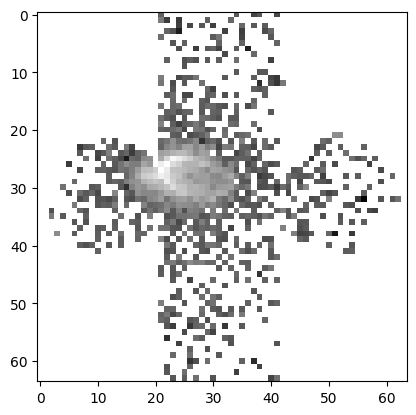

0.0 13003.399963378906
0.0 1848.300048828125


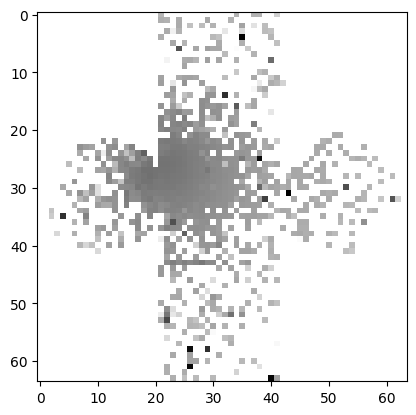

In [10]:
print(q.min(), q.max())
q/=nPMT_in_pixel
print(q.min(), q.max())
plt.imshow(q, cmap='gray', norm=LogNorm())
plt.show()
print(t.min(), t.max())
t/=nhit
print(t.min(), t.max())
plt.imshow(t, cmap='gray', norm=LogNorm())
plt.show()

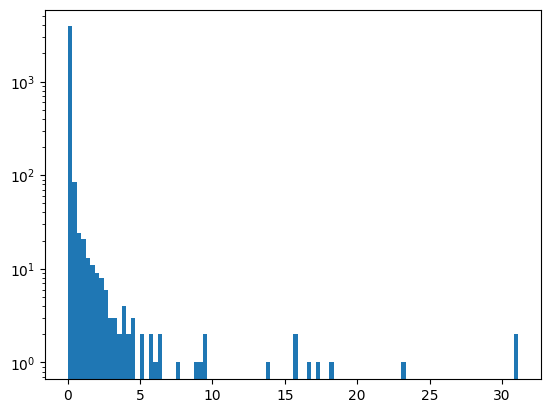

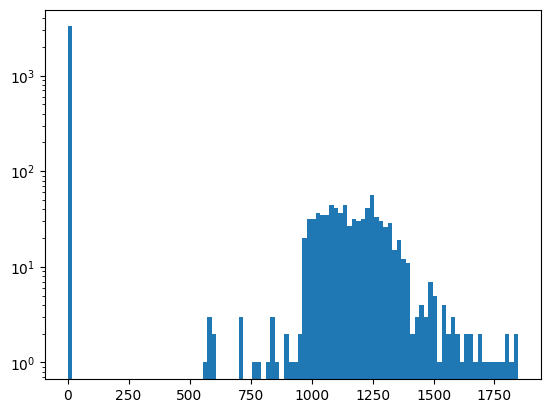

In [11]:
plt.hist(q.flatten(), bins=100)
plt.yscale('log')
plt.show()
plt.hist(t.flatten(), bins=100)
plt.yscale('log')
plt.show()

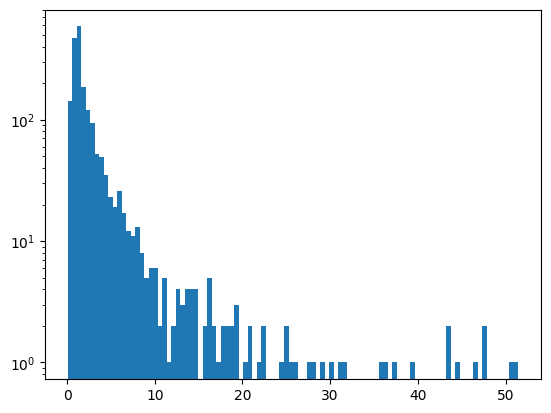

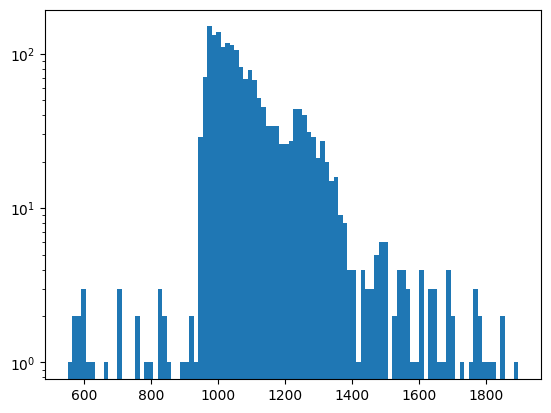

In [12]:
plt.hist(hit_charge.flatten(), bins=100)
plt.yscale('log')
plt.show()
plt.hist(hit_time.flatten(), bins=100)
plt.yscale('log')
plt.show()

In [13]:
def evt2img2d(hit_pmt, hit_charge, hit_time):
    q=np.zeros((size,size), np.float64)
    t=np.zeros((size,size), np.float64)
    nhit= np.zeros((size,size), np.int64)

    for pmt, charge, time in zip(hit_pmt, hit_charge, hit_time):
        xbin=pmt_id_img2d[pmt][1]
        ybin=pmt_id_img2d[pmt][2]
        q[xbin][ybin] += charge
        t[xbin][ybin] += time
        nhit[xbin][ybin] += 1

    nhit[np.where(nhit==0)]=1
    q/=nPMT_in_pixel
    t/=nhit

    return q, t, nhit #q_avg, t_avg, number of hit

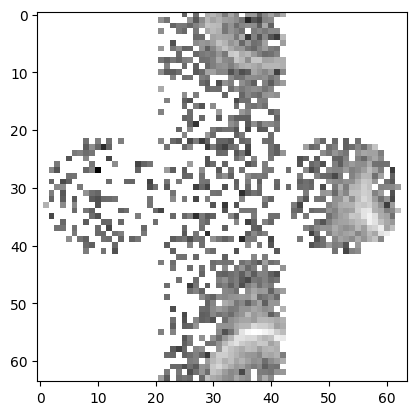

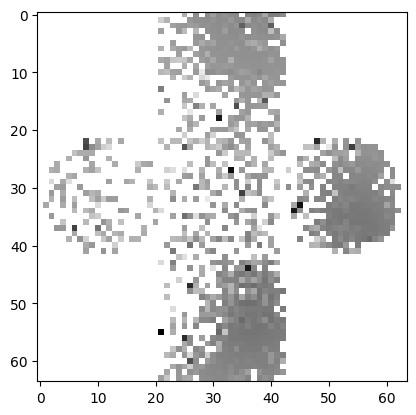

In [14]:
position = npz['position']
direction = npz['direction']
energy = npz['energy']
hit_pmt = npz['digi_hit_pmt']
hit_charge = npz['digi_hit_charge']
hit_time = npz['digi_hit_time']

q,t,_=evt2img2d(hit_pmt[3],hit_charge[3],hit_time[3])

plt.imshow(q, cmap='gray', norm=LogNorm())
plt.show()
plt.imshow(t, cmap='gray', norm=LogNorm())
plt.show()

In [18]:
npz_files = glob.glob('/scratch/users/k2261228/work/hyperk/ml/mc/eminus_muminus/npz/eminus_*')
npz_files.sort()
img2d = []
target = []
for npz in npz_files:
    print('Processing:', npz)
    event=np.load(npz, allow_pickle=True)
    position = event['position']
    direction = event['direction']
    energy = event['energy']
    hit_pmt = event['digi_hit_pmt']
    hit_charge = event['digi_hit_charge']
    hit_time = event['digi_hit_time']
    target.append(np.concatenate([energy.reshape(-1,1), position, direction], axis=1))
    for pmt, q, t in zip(hit_pmt, hit_charge, hit_time):
        img_q, img_t, img_hit = evt2img2d(pmt, q, t)
        img2d.append(np.concatenate([img_q.reshape(1,size,size), img_t.reshape(1,size,size)], axis=0))

img2d = np.array(img2d)
target = np.vstack(target)

Processing: /scratch/users/k2261228/work/hyperk/ml/mc/eminus_muminus/npz/eminus_110.0:1000.0MeV_random_4pi_HyperKRealistic_000.npz
Processing: /scratch/users/k2261228/work/hyperk/ml/mc/eminus_muminus/npz/eminus_110.0:1000.0MeV_random_4pi_HyperKRealistic_001.npz
Processing: /scratch/users/k2261228/work/hyperk/ml/mc/eminus_muminus/npz/eminus_110.0:1000.0MeV_random_4pi_HyperKRealistic_002.npz
Processing: /scratch/users/k2261228/work/hyperk/ml/mc/eminus_muminus/npz/eminus_110.0:1000.0MeV_random_4pi_HyperKRealistic_003.npz
Processing: /scratch/users/k2261228/work/hyperk/ml/mc/eminus_muminus/npz/eminus_110.0:1000.0MeV_random_4pi_HyperKRealistic_004.npz
Processing: /scratch/users/k2261228/work/hyperk/ml/mc/eminus_muminus/npz/eminus_110.0:1000.0MeV_random_4pi_HyperKRealistic_005.npz
Processing: /scratch/users/k2261228/work/hyperk/ml/mc/eminus_muminus/npz/eminus_110.0:1000.0MeV_random_4pi_HyperKRealistic_006.npz
Processing: /scratch/users/k2261228/work/hyperk/ml/mc/eminus_muminus/npz/eminus_110

In [19]:
np.save('/scratch/users/k2261228/work/hyperk/ml/mc/eminus_muminus/img2d/eminus_img2d.npy', img2d)
np.save('/scratch/users/k2261228/work/hyperk/ml/mc/eminus_muminus/img2d/eminus_target.npy', target)
np.save('/scratch/users/k2261228/work/hyperk/ml/mc/eminus_muminus/img2d/eminus_img2d_small.npy', img2d[:10000])
np.save('/scratch/users/k2261228/work/hyperk/ml/mc/eminus_muminus/img2d/eminus_target_small.npy', target[:10000])

In [ ]:
img2d.shape

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
